
# First Step into Quantum Computing

- Difficulties: Beginner
- QPU time usage: 11s

Welcome, hackers! We're thrilled to have you for the workshop. The main goal of this introductory hands-on is to make you ready for your quantum journey by 1) guiding you how to install qiskit 2) how to create IBM Cloud account and prepare `api_key` and `crn` to use a real quantum computer and 3) make your first quantum circuit, 4) solve a quantum state quiz and 5) Run you circuits on the real quantum computer and plot the result.


## 1. First things first: Qiskit

### What is Qiskit

<img src="https://www.ibm.com/quantum/images/qiskit/qiskit-community.svg">

The **[Qiskit SDK](https://www.ibm.com/quantum/qiskit)** is a high performance software stack built to help developers and researchers harness the full power of quantum computers at the utility scale and beyond. At its core is the Qiskit SDK, an open source software development kit for working with quantum computers at the level of extended quantum circuits. Operators and primitives. The Qiskit SDK allows anyone to get optimal performance from real quantum computers using their preferred computing environment. 

Beyond the SDK, Qiskit also includes a suite of high performance tools and services like [Qiskit Runtime Service](https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/runtime-service), which enables optimized computations at IBM quantum computers through the cloud using primitives that manage error mitigation. The Qiskit Transpiler service, which provides state of the art heuristic and AI powered methods that boost performance for common quantum circuit optimization tasks. 

[Qiskit functions](https://quantum.cloud.ibm.com/docs/en/guides/functions), a catalog of IBM and third party services that make it easy to optimize workloads and leverage Qiskit for industry use cases. Whether you're a quantum software developer, a quantum experimentalist, a computational scientist, or just looking to get started Qiskit’s modular, flexible framework lets you work at the abstraction level that best suits your needs. 

Qiskit is designed for extensibility and customization, so you can extract industry leading performance and tackle new kinds of problems. A high performance code base means a Qiskit SDK works faster, uses less memory, and delivers better results than ever before. And Qiskit also introduces you to a vast community of users and developers who are eager to welcome you and help answer your questions. First launched in 2019, [the Qiskit advocate program](https://www.ibm.com/quantum/community#advocates) is a global, community-centered initiative that recruits quantum computing professionals and enthusiasts from all over the world. Over the years, advocates have gone on to become recognized leaders in the quantum community. Want to be a next quantum leader? Don't hesitate to apply - [here](https://airtable.com/app8koO4BZifGFhCV/shrdoH8gIf6MOJ8bn)

### Install Qiskit

First, check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version we will use

``` python
from platform import python_version

print(python_version())
```
If that is not the case, you can upgrade it using your preferred tool. If you are unsure how to do it, some recommended options are:

- MacOS: [Homebrew](https://brew.sh/)
- Linux: `sudo apt-get update `

A detailed guide on how to upgrade Python depending on your OS is detailed here: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)


For more information take a look at the QGSS(Qiskit Global Summer School) 2025 wiki: https://github.com/qiskit-community/qgss-2025/wiki/Jupyter-Notebook-Environment-(Local-and-Online)

You can verify your installation by running the cell below. If you installed correctly, it will return the qiskit version.

In [ ]:
%pip install 'qiskit[visualization]'
%pip install qiskit-ibm-runtime
%pip install qiskit-aer

In [ ]:
import qiskit

print(f"Qiskit version: {qiskit.__version__}")

### Troubleshooting

If the previous cell raised an error, you can opt to install Qiskit in a virtual environment (two suggested methods follow). If you have no errors, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## 2. Set up your IBM Cloud account <a id="setting-ibm-cloud"></a>

To use a real quantum computer, you need an `api key` - a main entrance ticket to the cloud and a `crn` - token that will bring your resources to you by setting your account.

Set up your account as follows:

1. Go to the [IBM Quantum&reg; Platform](https://quantum.cloud.ibm.com/).
2. Go to the top right corner (as shown in the above picture), create your API token, and copy it to a secure location.
3. In the next cell, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the bottom left corner (as shown in the above picture) and **create your instance**. Make sure to choose the open plan.
5. After the instance is created, copy its associated CRN code. You may need to refresh to see the instance.
6. In the cell below, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

See [this guide](https://quantum.cloud.ibm.com/docs/guides/cloud-setup) for more details on how to set up your IBM Cloud&reg; account.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.

Additionally, if you are a member of the IBM partner network university, please use your institution's email address for your IBM ID to receive the partner benefit. 
</div>


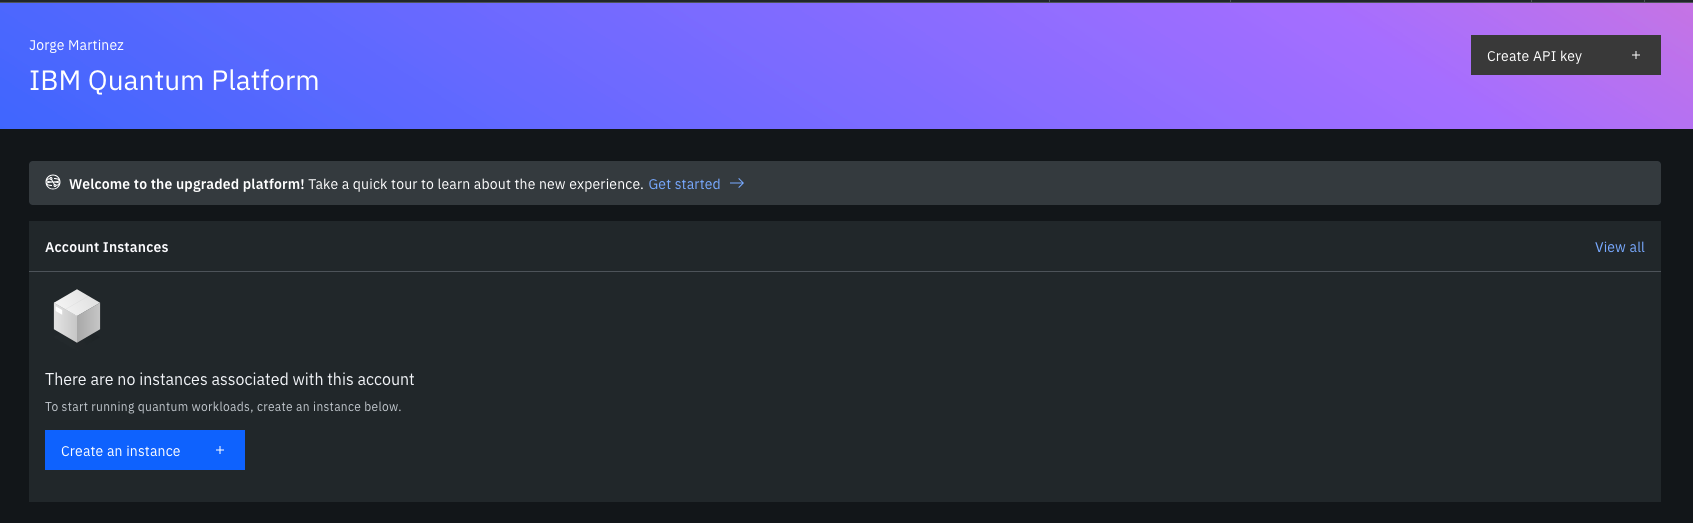




In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your API key and crn and have access to the quantum computers
your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key,
    instance=your_crn,
    overwrite=True
)

In [ ]:
# Check that the account has been saved properly
service = QiskitRuntimeService()
service.saved_accounts()

In [ ]:
# See backends you can use
service.backends()

## 3. Your first Quantum Circuit

### Quantum circuits

The fundamental unit of Qiskit is the **quantum circuit**, which is a series of instructions that a quantum computer can use to work with quantum bits of information, also known as **qubits**. These qubits have special properties that enable quantum computers to approach problems differently than how your laptop or iPhone might. Qiskit is rapidly advancing as a technology -- while you can still manually design your quantum circuits and decide how you want it to run (and there are plenty of good reasons to do so), IBM Quantum also provides you with tools that simplify the process. For the sake of learning, we are going to design a very simple circuit and run it on a simulator.

We're breezing through this overview because, honestly, we could spend hours just explaining the basics of quantum information and computation. In fact, IBM Quantum has done this already, producing a [written course](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/single-systems/introduction) and a series of [video lectures](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO) devoted to the topic. If you need a refresher, check them out!

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_distribution

import numpy as np
from numpy import sqrt

### Basic Operations on Qubits and Measurements

### Writing down single-qubit states
Let us start by looking at a single qubit. The main difference between a classical bit, which can take the values 0 and 1 only, is that a quantum bit, or **qubit**, can be in the states $\vert0\rangle$, $\vert1\rangle$, as well as a linear combination of these two states. This feature is known as superposition, and allows us to write the most general state of a qubit as: 

$$\vert\psi\rangle = \sqrt{1-p}\vert0\rangle + e^{i \phi} \sqrt{p}  \vert1\rangle$$

If we were to measure the state of this qubit, we would find the result $1$ with probability $p$, and the result $0$ with probability $1-p$. As you can see, the total probability is $1$, meaning that we will indeed measure either $0$ or $1$, and no other outcomes exists.

In addition to $p$, you might have noticed another parameter above. The variable $\phi$ indicates the relative quantum phase between the two states $\vert0\rangle$ and $\vert1\rangle$. As we will discover later, this relative phase is quite important. For now, it suffices to note that the quantum phase is what enables interference between quantum states, resulting in our ability to write quantum algorithms for solving specific tasks.


### Visualizing quantum states
We visualize quantum states throughout this exercise using what is known as a `qsphere`. Here is how the `qsphere` looks for the states $\vert0\rangle$ and $\vert1\rangle$, respectively. Note that the top-most part of the sphere represents the state $\vert0\rangle$, while the bottom represents $\vert1\rangle$.


In [ ]:
#visualize |0>
sv=Statevector([1, 0])
plot_state_qsphere(sv)

You can make the exactly same QSphere by using a quantum circuit. The statevector here we uses is from $|0\rangle$ state. In Qiskit, the qubit is initialized in $|0\rangle$ state. Try to run below circuit and see if you can get the same QSphere.

In [ ]:
qc1 = QuantumCircuit(1)
sv=Statevector(qc1)
plot_state_qsphere(sv)

Now let's visualize $|1\rangle$ State. 

It should be no surprise that the superposition state with quantum phase $\phi = 0$ and probability $p = 1/2$ (meaning an equal likelihood of measuring both 0 and 1) is shown on the `qsphere` with two points. However, note also that the size of the circles at the two points is smaller than when we had simply $\vert0\rangle$ and $\vert1\rangle$ above. This is because the size of the circles is proportional to the probability of measuring each one, which is now reduced by half.


In [ ]:
#visualize 1/sqrt(2)|0> + 1/sqrt(2)|1>

sv=Statevector([1/sqrt(2), 1/sqrt(2)])
plot_state_qsphere(sv)

In the case of superposition states, where the quantum phase is non-zero, the qsphere allows us to visualize that phase by changing the color of the respective blob. For example, the state with $\phi = 90^\circ$ (degrees) and probability $p = 1/2$ is shown in the `qsphere` below. 


In [ ]:
sv=Statevector([1/sqrt(2), 1/sqrt(2)*1j])
plot_state_qsphere(sv)

### Manipulating qubits
Qubits are manipulated by applying quantum gates. Let's go through an overview of the different gates that we will consider in the following exercises.

First, let's describe how we can change the value of $p$ for our general quantum state. To do this, we will use two gates:

1. **$X$-gate**: This gate flips between the two states $\vert0\rangle$ and $\vert1\rangle$. This operation is the same as the classical NOT gate. As a result, the $X$-gate is sometimes referred to as a bit flip or NOT gate. Mathematically, the $X$ gate changes $p$ to $1-p$, so in particular from 0 to 1, and vice versa.

2. **$H$-gate**: This gate allows us to go from the state $\vert0\rangle$  to the state $\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$. This state is also known as the $\vert+\rangle$. Mathematically, this means going from $p=0, \phi=0$ to  $p=1/2, \phi=0$.  As the final state of the qubit is a superposition of $\vert0\rangle$ and $\vert1\rangle$, the Hadamard gate represents a true quantum operation.


Notice that both gates changed the value of $p$, but not $\phi$. Fortunately for us, it's quite easy to visualize the action of these gates by looking at the figure below.


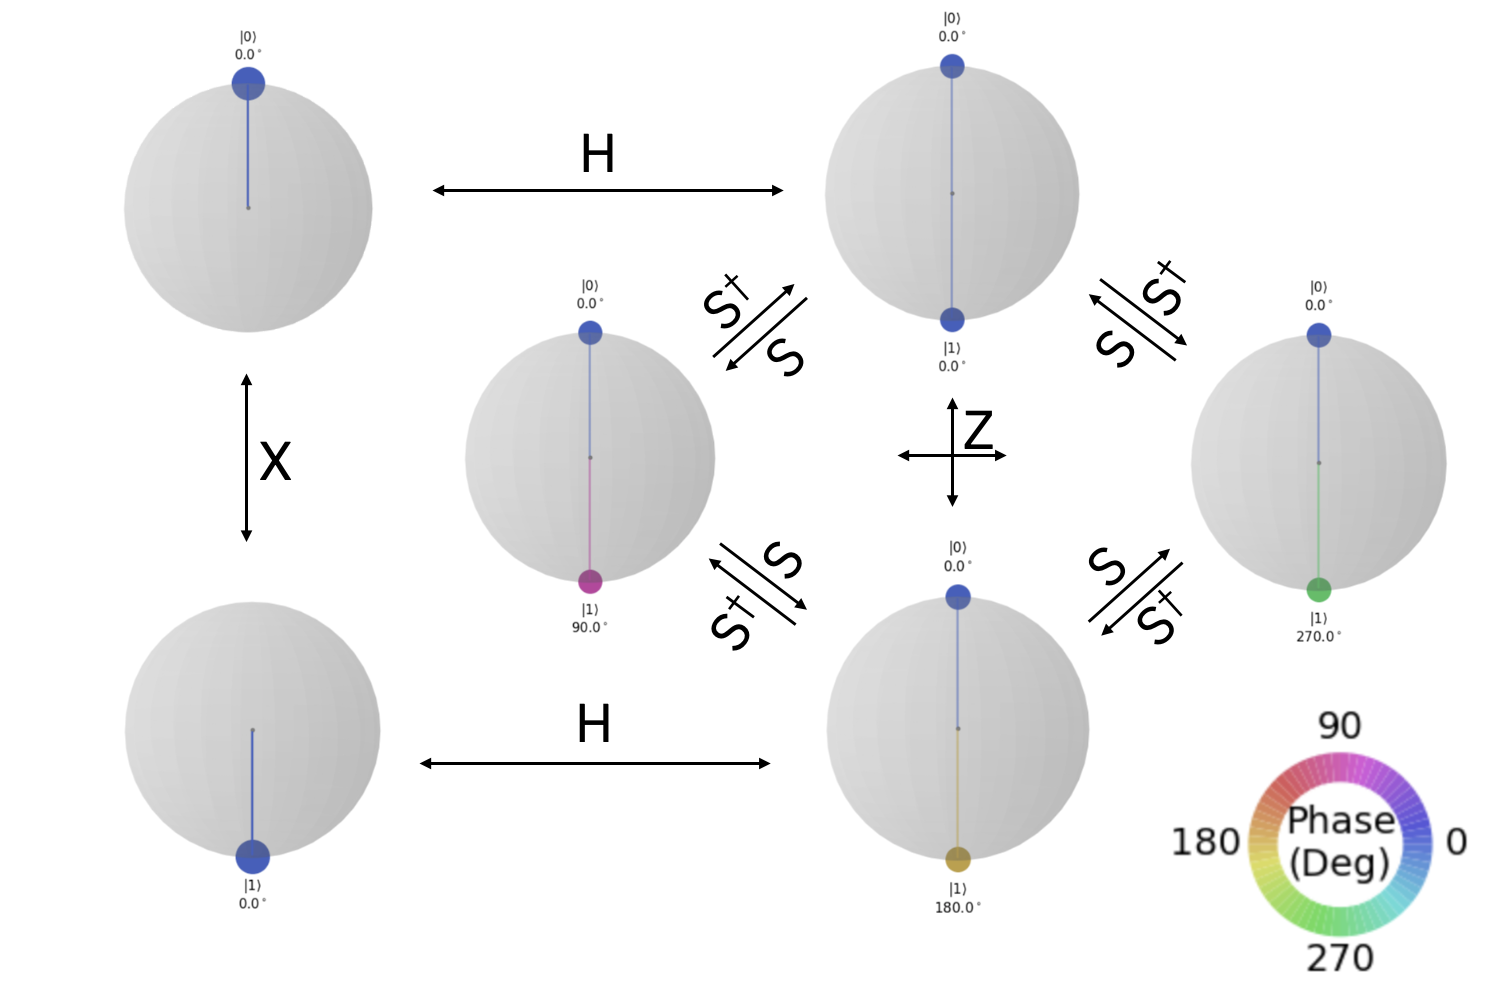

Once we have the state $\vert+\rangle$, we can then change the quantum phase by applying several other gates. For example, an $S$ gate adds a phase of $90$ degrees to $\phi$, while the $Z$ gate adds a phase of $180$ degrees to $\phi$. To subtract a phase of $90$ degrees, we can apply the $S^\dagger$ gate, which is read as S-dagger, and commonly written as `sdg`. Finally, there is a $Y$ gate which applies a sequence of $Z$ and $X$ gates.

You can experiment with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to become accustomed to the different operations and how they affect the state of a qubit. To do so, you can visit [Circuit Composer](https://quantum.cloud.ibm.com/composer) and start our circuit widget. After visiting the circuit composer, choose a gate to apply to a qubit, and then choose the qubit (in the first examples, the only qubit to choose is qubit 0).  Watch how the corresponding state changes with each gate, as well as the description of that state. It will also provide you with the code that creates the corresponding quantum circuit in Qiskit.

If you want to learn more about describing quantum states, Pauli operators, and other single-qubit gates, see [Quantum Information](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/single-systems/quantum-information) of the Single System of the [Basics of Quantum Information](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information) Course by John Watrous. 

### Practices:  Quantum Circuits Using Single-Qubit Gates

Here are four small practices to attain different states on the qsphere. You can either solve them with the circuit composer and copy and paste the code it provides into the respective cells to create the quantum circuits, or you can directly insert a combination of the following code lines into the program to apply the different gates: 

    qc.x(0)    # bit flip
    qc.y(0)    # bit and phase flip
    qc.z(0)    # phase flip
    qc.h(0)    # superpostion
    qc.s(0)    # quantum phase rotation by pi/2 (90 degrees)
    qc.sdg(0)  # quantum phase rotation by -pi/2 (90 degrees)
    
The '(0)' indicates that we apply this gate to qubit 'q0', which is the first (and in this case only) qubit.

Try to attain the given state on the qsphere in each of the following exercises.

#### i) Let us start  by performing a bit flip. The goal is to reach the state $\vert1\rangle$ starting from state $\vert0\rangle$. 


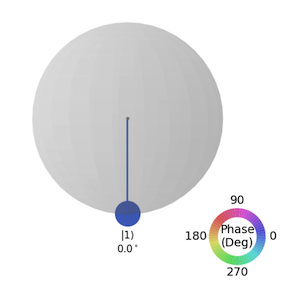

In [ ]:

def create_circuit():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

# check solution
qc2 = create_circuit()
state = Statevector(qc2)

plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True) 

#### ii) Next, let's create a superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 

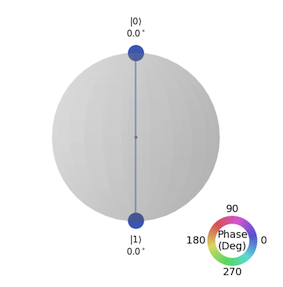

In [ ]:

def create_circuit2():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc3 = create_circuit2()
state = Statevector(qc3)
plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True) 

#### iii) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

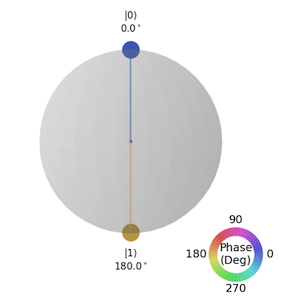

Can you combine the above two tasks to come up with the solution?

In [ ]:
def create_circuit3():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc4 = create_circuit3()
state = Statevector(qc4)
plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True) 

#### iv) Finally, we move on to the complex numbers. The goal is to reach the state $|\circlearrowleft\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$

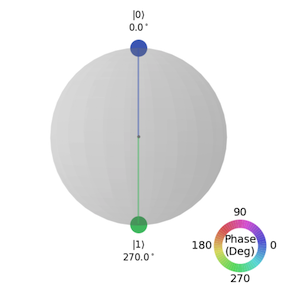

In [ ]:
def create_circuit4():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc5 = create_circuit4()
state = Statevector(qc5)

plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True) 

## 4. Quantum Quiz with Multi-Qubit Gates

Great job! Now that you've understood the single-qubit gates, let us look at gates operating on multiple qubits. Here you will be asked to solve 4 quantum state quizzes by combining single-qubit gates and multi-qubit gates. The basic gates on two qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

If you'd like to read more about the different multi-qubit gates and their relations, visit [Quantum Information](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/multiple-systems/quantum-information) of multiple systems, of John's `Basics of Quantum Information` Course.

Note that for two qubits a general state is of the form $a|00\rangle + b |01\rangle + c |10\rangle + d|11\rangle$, where $a$, $b$, $c$, and $d$ are complex numbers whose absolute values squared give the probability to measure the respective state; e.g., $|a|^2$ would be the probability to end in state '0' on both qubits. This means we can now have up to four points on the qsphere.

We start with the canonical two qubit gate, the controlled-NOT (also CNOT or CX) gate.  Here, as with all controlled two qubit gates, one qubit is labelled as the "control", while the other is called the "target". If the control qubit is in state $|0\rangle$, it applies the identity $I$ gate to the target, i.e., no operation is performed. Instead, if the control qubit is in state $|1\rangle$, an X-gate is performed on the target qubit. Therefore, with both qubits in one of the two classical states, $|0\rangle$ or $|1\rangle$, the CNOT gate is limited to classical operations.

This situation changes dramatically when we first apply a Hadamard gate to the control qubit, bringing it into the superposition state $|+\rangle$.  The action of a CNOT gate on this non-classical input can produce highly entangled states between control and target qubits. If the target qubit is initially in the $|0\rangle$ state, the resulting state is denoted by $|\Phi^+\rangle$, and is one of the so-called [Bell states](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/multiple-systems/quantum-information#bell-states). 

#### i) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.  

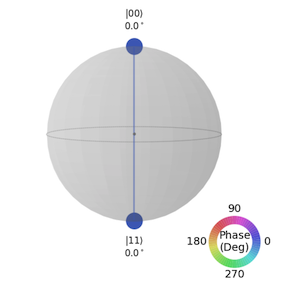


For this state we would have probability $\frac{1}{2}$ to measure "00" and probability $\frac{1}{2}$ to measure "11". Thus, the outcomes of both qubits are perfectly correlated.

In [ ]:

def create_circuit5():
    qc = QuantumCircuit(2)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc6 = create_circuit5()
state = Statevector(qc6) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc6.draw(output='mpl') # we draw the circuit

Next, try to create the state of perfectly anti-correlated qubits. Note the minus sign here, which indicates the relative phase between the two states. 

#### ii) Construct the Bell state $\vert\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$.

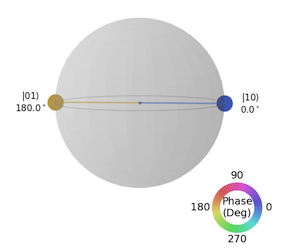

In [ ]:


def create_circuit6():
    qc = QuantumCircuit(2)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc7 = create_circuit6()
state = Statevector(qc7) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc7.draw(output='mpl') # we draw the circuit

### iii) You are given the quantum circuit described in the function below. Swap the states of the first and the second qubit to get this QSphere.

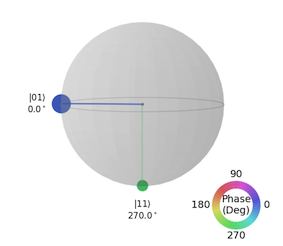

In [ ]:
def create_circuit7():
    qc = QuantumCircuit(2)
    qc.rx(np.pi/3,0)
    qc.x(1)
    return qc

qc8 = create_circuit7()

#
#
# FILL YOUR CODE IN HERE
#
#


state = Statevector(qc8) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc8.draw(output='mpl') # we draw the circuit

#### iv) Write a program from scratch that creates the GHZ state (on three qubits), $\vert \text{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$

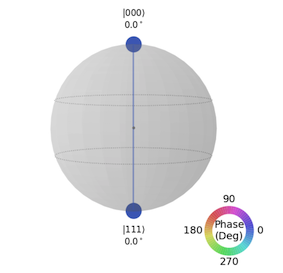

In [ ]:

def create_circuit8():
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    #
    return qc

qc9 = create_circuit8()


pub4 = (qc9)

state = Statevector(qc9) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc9.draw(output='mpl') # we draw the circuit


## 5. Run your circuit and see the measured result with a real quantum computer

Now that we know how to build a quantum circuit to manipulate a statevector of qubits. And it is time for the most exciting part: running it and seeing the output! Here we'll learn the modern and effective way to execute our circuits using Qiskit.

A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogeneous (CPU/GPU/QPU) computing infrastructure. 

The four steps of a Qiskit pattern are as follows:

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results

We just finished `Step 1: Mapping`, by building quantum circuits to generate the desired quantum state. Now, let's walk through the remaining steps to see the results. 

### Optimize

Here we will set the backend to run circuits - you can select `least busy` qpu among your accessible qpu groups, or you can simply choose a simulator if you don't have enough remaining GPU time. Once select a backend, `pass_manager` will `transpile` your circuits into native gate sets of the backend you chose and optimize it for you to get a better result. You can easily declare `pass_manager` by using `generate_preset_pass_manager` and setting the `optimization_level`, which is a higher number indicating more optimization steps. 

The next step is exciting - we are going to run the quantum circuit using Qiskit Runtime! 

We will do that using the two [Qiskit primitives](https://quantum.cloud.ibm.com/docs/guides/primitives):
1. **Sampler** samples the output register from the execution of one or more quantum circuits. Its output is counts on per-shot measurements. 
2. **Estimator** computes the expectation value of one or more observables with respect to the states generated by the quantum circuit. Its output consist of the expectation values along with their standard errors.

Here, we will use `Sampler` to execute our circuits. The code cell below shows you first define a backend and a pass manager for it. Then, it will add `measurement` to all circuits and create an array of quantum circuits (`pub`) to pass to the Sampler. 

In [ ]:

backend=service.least_busy()
#backend=AerSimulator()

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
sampler = Sampler(mode=backend)


pub = []
for qc in circ:
    qc.measure_all()
    pub.append(pm.run(qc))

### Execute

Let's execute our circuits. In case of there are many waiting queue at the cloud, print out and save job_id for a later use and check the job_status. After you see the job status change to `Done`, retrieve the job result.

In [ ]:
job = sampler.run(pub)
job_id = job.job_id()
print(job_id)
job.status()

In [ ]:
job_retrived = service.job(job_id)
result = job.result()

### Post-process

The final step is to interpret the visualization to understand the quantum states we've created. Before plotting several graphs, let's bring all the counts from all circuits. Then we will make 4 plots by categorizing circuits.

In [ ]:
result = job.result()
counts_all = [result[k].data.meas.get_counts() for k in range(9)]


**The Single Qubit States**

In [ ]:
plot_distribution([counts_all[0], counts_all[1]], legend =['qc1', 'qc2'])

**The Superpositioned One Qubit States**

In [ ]:
plot_distribution([counts_all[2], counts_all[3], counts_all[4]], legend =['qc3', 'qc4', 'qc5'])

**Two Qubit States**

In [ ]:
plot_distribution([counts_all[5], counts_all[6], counts_all[7]],legend =['qc6', 'qc7', 'qc8'] )

**Three Qubit States**

In [ ]:
plot_distribution(counts_all[8], legend=['qc9'])

## Further challenge

Did you find any noise in the actual backend experimental results? Removing qubit noise is one of the active research areas. Try [Qiskit Runtime's various error mitigation and surpression options](https://quantum.cloud.ibm.com/docs/en/guides/error-mitigation-and-suppression-techniques) to see how the noise in the execution results changes! (Note) These options allow for more QPU time.


## Additional Info

In [4]:
import qiskit, qiskit_ibm_runtime

print("Qiskit version:", qiskit.version.get_version_info())
print("Qiskit Runtime version:", qiskit_ibm_runtime.__version__)

Qiskit version: 2.1.1
Qiskit Runtime version: 0.40.1


**Created by:** Sophy Shin

**Reviewed by:**  Nate Earnest-Noble



<div class="alert alert-info">

© IBM Corp., 2025

This is licensed under the Apache License, Version 2.0. You may obtain a copy of this license in the LICENSE file in the root directory of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.

Any modifications or derivative works of this must retain this copyright notice, and modified files need to carry a notice indicating that they have been altered from the originals.
</div>